In [1]:
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import Berger_Fernandes_Lu_Tosaria_Wang_Baseline as facial_functions

Using TensorFlow backend.


In [3]:
workDir = 'C:\\Users\\miber\Dropbox\\Data_Science_Master\\3_Trimester\\w207-machine-learning\\Assignments'

In [4]:
df_train, df_test = facial_functions.read_train_and_test(
                                        os.path.join(workDir, "data", "training.csv"),
                                        os.path.join(workDir, "data", "test.csv"))
df_train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
kaggle_train = facial_functions.preprocess_pixels(df_train)
kaggle_train.head()

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,238,236,237,238,240,240,239,241,241,243,...,33,29,30,34,39,49,62,70,75,90
1,219,215,204,196,204,211,212,200,180,168,...,1,1,1,1,1,1,1,1,1,1
2,144,142,159,180,188,188,184,180,167,132,...,64,60,56,61,70,69,71,78,78,77
3,193,192,193,194,194,194,193,192,168,111,...,1,1,1,1,1,1,1,1,1,1
4,147,148,160,196,215,214,216,217,219,220,...,33,34,37,37,43,46,83,140,170,176


Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')
left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_c

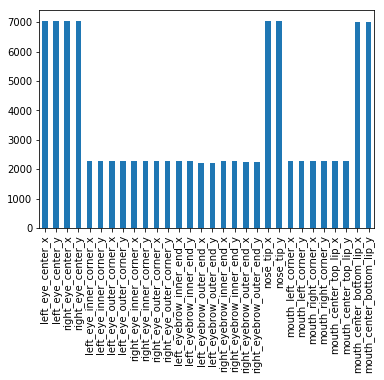

In [6]:
labels = facial_functions.create_labels(df_train,0,30) 
print(labels.columns)
print(labels.isnull().sum())
# The same information displayed visually
labels.describe().loc['count'].plot.bar()

In [7]:
kaggle_test = facial_functions.preprocess_pixels(df_test)
kaggle_test.head()

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,182,183,182,182,180,180,176,169,156,137,...,6,14,28,28,24,18,12,8,5,5
1,76,87,81,72,65,59,64,76,69,42,...,156,152,162,169,168,159,191,228,211,168
2,177,176,174,170,169,169,168,166,166,166,...,1,1,1,1,1,1,1,1,1,1
3,176,174,174,175,174,174,176,176,175,171,...,144,143,141,142,143,142,142,142,142,140
4,50,47,44,101,144,149,120,58,48,42,...,254,254,254,253,255,236,174,175,175,165


## Optional Classification and Regression Model

In [58]:
train_balanced, labels_balanced = facial_functions.creating_balanced_dataset(kaggle_train, labels)

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
count,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280,...,4280,4280,4280,4280,4280,4280,4280,4280,4280,4280
unique,256,256,256,256,256,256,256,255,254,255,...,256,256,256,255,256,256,256,256,256,255
top,255,255,255,255,27,37,31,33,23,23,...,255,255,255,255,255,255,255,255,255,255
freq,143,115,88,73,57,52,55,57,56,57,...,189,208,229,233,251,264,266,281,290,307


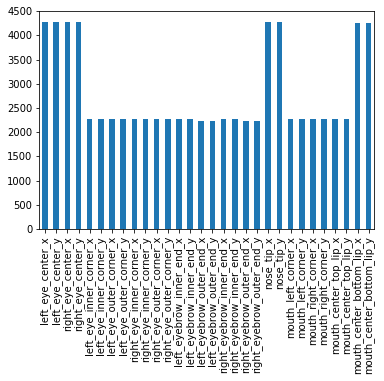

In [60]:
labels_balanced.describe().loc['count'].plot.bar()

In [61]:
reg_data, reg_labels = facial_functions.separate_non_missing(train_balanced, labels_balanced, normalize=True)

Correct shape for train features? (2140, 9216)
Correct shape for train labels? (2140, 30)


In [62]:
labels_adj = facial_functions.class_reg_labels_with_zero(labels_balanced)
labels_adj.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,...,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000
mean,66.005816,37.320266,30.056942,37.611079,31.390388,20.133769,38.841167,19.972380,19.422456,20.131098,...,48.196185,61.077635,33.550311,40.275129,17.449513,40.403755,25.500949,38.759750,48.052104,79.272604
std,4.675140,3.534670,3.497606,3.664818,29.592594,19.013424,36.688704,18.938910,18.375433,19.037675,...,4.429718,6.015497,31.728298,38.067008,16.673573,38.159825,24.064965,36.589959,5.824259,8.647976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.944699,17.932414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.984041,35.719375,28.684601,36.109291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,46.489866,57.153135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.443988,76.076802
50%,66.274912,37.306872,30.093413,37.521708,55.979697,34.750553,69.449942,33.442880,33.743563,34.726941,...,48.208983,61.149529,57.559752,69.334023,27.038192,69.474805,44.284532,65.142693,48.335163,79.524401
75%,67.729389,38.920043,31.562373,39.182262,59.417584,38.057048,73.437223,37.795684,36.764683,38.050852,...,50.041607,65.302680,63.399291,76.081895,33.194249,76.331537,48.062235,72.998069,50.371491,83.314605
max,94.689280,73.241126,85.039381,78.374400,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [65]:
norm_x_train, class_labels = facial_functions.separate_non_missing(train_balanced, labels_adj, normalize=True)

Correct shape for train features? (4280, 9216)
Correct shape for train labels? (4280, 30)


In [66]:
x_train, y_train, x_val, y_val = facial_functions.split_train_and_test(norm_x_train, class_labels, percent=.8, seed=123)

validation set shape (20%): (856, 9216) (856, 30)
train set shape (80%): (3424, 9216) (3424, 30)


In [67]:
x_val, y_val = facial_functions.reshape_image(x_val, y_val)

val feature shape (856, 96, 96, 1) val labels shape (856, 30)


In [68]:
class_labels = facial_functions.classification_labels(y_train)
class_labels[:5,]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]])

In [69]:
class_val = facial_functions.classification_labels(y_val)
class_val[:5,]

array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]])

In [70]:
class_labels.shape

(3424, 30)

In [71]:
x_train.shape

(3424, 9216)

In [72]:
cl_model_fitted = facial_functions.run_classification_model(x_train, class_labels, x_val, class_val, epochs=10, lr=.01)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 64)        256       
__________

In [73]:
class_val_matrix = facial_functions.adjusting_keypoint_prediction(cl_model_fitted, x_val, 0.1)

In [74]:
class_val_matrix

array([[1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.]], dtype=float32)

In [75]:
class_val_matrix.shape

(856, 30)

In [77]:
# Running regression model
reg_train_data, reg_train_labels, reg_val_data, reg_val_labels = facial_functions.split_train_and_test(reg_data, 
                                                                                       reg_labels, 
                                                                                       percent=.8,
                                                                                       seed=123)

reg_val_data, reg_val_labels = facial_functions.reshape_image(reg_val_data, reg_val_labels)

reg_model = facial_functions.run_augmented_cnn_model_return_model(reg_train_data, reg_train_labels, 
                                                 reg_val_data, reg_val_labels, 
                                                 epochs=10, lr=.01)

validation set shape (20%): (428, 9216) (428, 30)
train set shape (80%): (1712, 9216) (1712, 30)
val feature shape (428, 96, 96, 1) val labels shape (428, 30)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)  

In [78]:
facial_functions.evaluate_clas_reg_rmse(cl_model_fitted, reg_model, x_val, class_val)

43.01651263528343